In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"arjunbj01","key":"ca39615c84800c8e1ca9cfef476c3ec4"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Jun 24 10:58 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           4992  
thegurus/spanish-high-speed-rail-system-ticket-pricing  Spanish High Speed Rail tickets pricing - Renfe    27MB  2019-05-10 06:50:30           1263  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21           1917  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1816  
taniaj/australian-election-2019-tweets                  Australian Election 2019 Tweets             

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!kaggle datasets download --force paultimothymooney/chest-xray-pneumonia

 99% 1.14G/1.15G [00:14<00:00, 57.4MB/s]
100% 1.15G/1.15G [00:14<00:00, 84.0MB/s]


In [0]:
!ls
!unzip chest-xray-pneumonia.zip

 chest_xray		    chest_xray.zip    'kaggle (2).json'   __MACOSX
 chest-xray-pneumonia.zip  'kaggle (1).json'   kaggle.json	  sample_data
Archive:  chest-xray-pneumonia.zip
replace chest_xray.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: chest_xray.zip          


In [0]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
replace chest_xray/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: chest_xray/.DS_Store    
  inflating: __MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/test/.DS_Store  
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person124_bacteria_589.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1647_viru

Importing required libs

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [0]:
mainDIR='/content/chest_xray/'

In [0]:
print(mainDIR)

/content/chest_xray/


In [0]:
train_folder= '/content/chest_xray/train/'
val_folder = '/content/chest_xray/val/'
test_folder = '/content/chest_xray/test/'


In [0]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1342
normal picture title:  IM-0545-0001.jpeg
pneumonia picture title: person292_bacteria_1378.jpeg


Text(0.5, 1.0, 'Pneumonia')

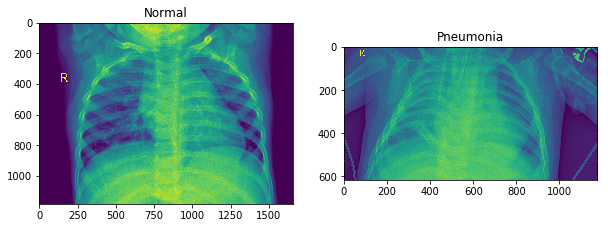

In [0]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

Building a CNN Model


In [0]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

data processing

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/chest_xray/train/',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/content/chest_xray/val/',target_size=(64, 64),batch_size=32,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/chest_xray/test/', target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
cnn_model = model.fit_generator(training_set, steps_per_epoch = 163, epochs = 40, validation_data = validation_generator, validation_steps = 624)

W0624 16:16:39.676091 140065183917952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/40
163/163 [==============================] - 165s 1s/step - loss: 0.3474 - acc: 0.8503 - val_loss: 0.2475 - val_acc: 0.9375
Epoch 2/40
163/163 [==============================] - 143s 876ms/step - loss: 0.2342 - acc: 0.9024 - val_loss: 0.2446 - val_acc: 0.8750
Epoch 3/40
163/163 [==============================] - 141s 865ms/step - loss: 0.2089 - acc: 0.9128 - val_loss: 0.6181 - val_acc: 0.6250
Epoch 4/40
163/163 [==============================] - 141s 862ms/step - loss: 0.1786 - acc: 0.9321 - val_loss: 0.7147 - val_acc: 0.6250
Epoch 5/40
163/163 [==============================] - 140s 862ms/step - loss: 0.1730 - acc: 0.9331 - val_loss: 0.7065 - val_acc: 0.6250
Epoch 6/40
163/163 [==============================] - 140s 859ms/step - loss: 0.1826 - acc: 0.9252 - val_loss: 0.3394 - val_acc: 0.7500
Epoch 7/40
163/163 [==============================] - 140s 857ms/step - loss: 0.1697 - acc: 0.9337 - val_loss: 0.2261 - val_acc: 0.9375
Epoch 8/40
163/163 [==============================]

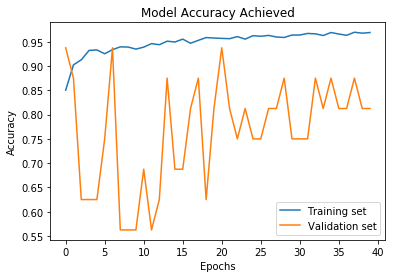

In [0]:
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy Achieved')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

saving the model